## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_136426_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (76060, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac       lng  \
0      GSABZT030K000A240116569  2024-04-23 17:55:00  NaN  3.55  109.1735   
1      GSABZT030K000A240116569  2024-04-23 18:00:00  NaN  3.20  109.1735   
2      GSABZT030K000A240116569  2024-04-23 18:05:00  NaN  2.41  109.1735   
3      GSABZT030K000A240116569  2024-04-23 18:10:00  NaN  2.18  109.1735   
4      GSABZT030K000A240116569  2024-04-23 18:15:00  NaN  2.02  109.1735   
...                        ...                  ...  ...   ...       ...   
76055  GSABZT030K000A240116569  2025-05-10 18:55:00  0.0  0.00  109.1735   
76056  GSABZT030K000A240116569  2025-05-10 19:00:00  0.0  0.00  109.1735   
76057  GSABZT030K000A240116569  2025-05-10 19:05:00  0.0  0.00  109.1735   
76058  GSABZT030K000A240116569  2025-05-10 19:10:00  0.0  0.00  109.1735   
76059  GSABZT030K000A240116569  2025-05-10 19:15:00  0.0  0.00  109.1735   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      22.351795     阳光棚双坡    5.0             NaN                   NaN  ...   
1      22.351795     阳光棚双坡    5.0         28.4533               70.3228  ...   
2      22.351795     阳光棚双坡    5.0             NaN                   NaN  ...   
3      22.351795     阳光棚双坡    5.0             NaN                   NaN  ...   
4      22.351795     阳光棚双坡    5.0         28.1217               72.3710  ...   
...          ...       ...    ...             ...                   ...  ...   
76055  22.351795     阳光棚双坡    5.0             NaN                   NaN  ...   
76056  22.351795     阳光棚双坡    5.0         24.0901               96.4385  ...   
76057  22.351795     阳光棚双坡    5.0             NaN                   NaN  ...   
76058  22.351795     阳光棚双坡    5.0             NaN                   NaN  ...   
76059  22.351795     阳光棚双坡    5.0         23.9188               96.4309  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                      142.5925            37.4604          2.3851   
2                           NaN                NaN             NaN   
3                           NaN                NaN             NaN   
4                      103.0997            26.2175          2.1678   
...                         ...                ...             ...   
76055                       NaN                NaN             NaN   
76056                    2.6063             3.1082          2.3410   
76057                       NaN                NaN             NaN   
76058                       NaN                NaN             NaN   
76059                    0.8688             1.0361          2.6595   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1              3.8805           4.2776              7.1983   
2                 NaN              NaN                 NaN   
3                 NaN              NaN                 NaN   
4              3.7597           4.1994              7.2360   
...               ...              ...                 ...   
76055             NaN              NaN                 NaN   
76056          4.2187           4.7341             34.1636   
76057             NaN              NaN                 NaN   
76058             NaN              NaN                 NaN   
76059          4.7508           5.3217             32.4313   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                  6.7597               6.5602  2024-04-23 18:00:00   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                  7.4068               7.3579  2024-04-23 18:15:00   
...                   ...                  ...                  ...   
76055                 NaN                  NaN                  NaN   


In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0      2024-04-23 17:55:00  GSABZT030K000A240116569  2024-04-23 17:55:00  NaN   
1      2024-04-23 18:00:00  GSABZT030K000A240116569  2024-04-23 18:00:00  NaN   
2      2024-04-23 18:05:00  GSABZT030K000A240116569  2024-04-23 18:05:00  NaN   
3      2024-04-23 18:10:00  GSABZT030K000A240116569  2024-04-23 18:10:00  NaN   
4      2024-04-23 18:15:00  GSABZT030K000A240116569  2024-04-23 18:15:00  NaN   
...                    ...                      ...                  ...  ...   
110028 2025-05-10 18:55:00  GSABZT030K000A240116569  2025-05-10 18:55:00  0.0   
110029 2025-05-10 19:00:00  GSABZT030K000A240116569  2025-05-10 19:00:00  0.0   
110030 2025-05-10 19:05:00  GSABZT030K000A240116569  2025-05-10 19:05:00  0.0   
110031 2025-05-10 19:10:00  GSABZT030K000A240116569  2025-05-10 19:10:00  0.0   
110032 2025-05-10 19:15:00  GSABZT030K000A240116569  2025-05-10 19:15:00  0.0   

         pac       lng        lat roof_type  angle  temperature_2m  ...  \
0       3.55  109.1735  22.351795     阳光棚双坡    5.0             NaN  ...   
1       3.20  109.1735  22.351795     阳光棚双坡    5.0         28.4533  ...   
2       2.41  109.1735  22.351795     阳光棚双坡    5.0             NaN  ...   
3       2.18  109.1735  22.351795     阳光棚双坡    5.0             NaN  ...   
4       2.02  109.1735  22.351795     阳光棚双坡    5.0         28.1217  ...   
...      ...       ...        ...       ...    ...             ...  ...   
110028  0.00  109.1735  22.351795     阳光棚双坡    5.0             NaN  ...   
110029  0.00  109.1735  22.351795     阳光棚双坡    5.0         24.0901  ...   
110030  0.00  109.1735  22.351795     阳光棚双坡    5.0             NaN  ...   
110031  0.00  109.1735  22.351795     阳光棚双坡    5.0             NaN  ...   
110032  0.00  109.1735  22.351795     阳光棚双坡    5.0         23.9188  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1                32.6628                  142.5925            37.4604   
2                    NaN                       NaN                NaN   
3                    NaN                       NaN                NaN   
4                19.7721                  103.0997            26.2175   
...                  ...                       ...                ...   
110028               NaN                       NaN                NaN   
110029            0.4440                    2.6063             3.1082   
110030               NaN                       NaN                NaN   
110031               NaN                       NaN                NaN   
110032            0.1480                    0.8688             1.0361   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1               2.3851          3.8805           4.2776              7.1983   
2                  NaN             NaN              NaN                 NaN   
3                  NaN             NaN              NaN                 NaN   
4               2.1678          3.7597           4.1994              7.2360   
...                ...             ...              ...                 ...   
110028             NaN             NaN              NaN                 NaN   
110029          2.3410          4.2187           4.7341             34.1636   
110030             NaN             NaN              NaN                 NaN   
110031             NaN             NaN              NaN                 NaN   
110032          2.6595          4.7508           5.3217             32.4313   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1                   6.7597               6.5602  2024-04-23 18:00:00  
2                      NaN                  NaN                  NaN  
3                      NaN       

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    21,     22,     23,     24,     25,     26,     27,     28,     29,
            30,
        ...
        109864, 109865, 109866, 109867, 109868, 109869, 109870, 109871, 109872,
        109873],
       dtype='int64', length=50960),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    21,     22,     23,     24,     25,     26,     27,     28,     29,
            30,
        ...
        109864, 109865, 109866, 109867, 109868, 109869, 109870, 109871, 109872,
        109873],
       dtype='int64', length=50960),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        109864, 109865, 109866, 109867, 109868, 109869, 109870, 109871, 109872,
        109873],
       dtype='int64', length=51357),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    21,     22,     23,     24,     25,     26,     27,     28,     29,
            30,
        ...
        109864, 109865, 109866, 109867, 109868, 109869, 109870, 109871, 109872,
        109873],
       dtype='int64', length=50960),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    21,     22,     23,     24,     25,     26,     27,     28,     29,
            30,
        ...
        109864, 109865, 109866, 109867, 109868, 109869, 109870, 109871, 109872,
        109873],
       dtype='int64', length=50960),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     0,      2,      3,      5,      6,      8,      9,     11,     12,
            14,
        ...
        110018, 110019, 110021, 110022, 110024, 110025, 110027, 110028, 110030,
        110031],
       dtype='int64', length=73355),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0      2024-04-23 17:55:00  GSABZT030K000A240116569  2024-04-23 17:55:00  0.0   
1      2024-04-23 18:00:00  GSABZT030K000A240116569  2024-04-23 18:00:00  0.0   
2      2024-04-23 18:05:00  GSABZT030K000A240116569  2024-04-23 18:05:00  0.0   
3      2024-04-23 18:10:00  GSABZT030K000A240116569  2024-04-23 18:10:00  0.0   
4      2024-04-23 18:15:00  GSABZT030K000A240116569  2024-04-23 18:15:00  0.0   
...                    ...                      ...                  ...  ...   
110028 2025-05-10 18:55:00  GSABZT030K000A240116569  2025-05-10 18:55:00  0.0   
110029 2025-05-10 19:00:00  GSABZT030K000A240116569  2025-05-10 19:00:00  0.0   
110030 2025-05-10 19:05:00  GSABZT030K000A240116569  2025-05-10 19:05:00  0.0   
110031 2025-05-10 19:10:00  GSABZT030K000A240116569  2025-05-10 19:10:00  0.0   
110032 2025-05-10 19:15:00  GSABZT030K000A240116569  2025-05-10 19:15:00  0.0   

         pac       lng        lat roof_type  angle  temperature_2m  ...  \
0       3.55  109.1735  22.351795     阳光棚双坡    5.0             NaN  ...   
1       3.20  109.1735  22.351795     阳光棚双坡    5.0       28.453300  ...   
2       2.41  109.1735  22.351795     阳光棚双坡    5.0       28.342767  ...   
3       2.18  109.1735  22.351795     阳光棚双坡    5.0       28.232233  ...   
4       2.02  109.1735  22.351795     阳光棚双坡    5.0       28.121700  ...   
...      ...       ...        ...       ...    ...             ...  ...   
110028  0.00  109.1735  22.351795     阳光棚双坡    5.0       24.155933  ...   
110029  0.00  109.1735  22.351795     阳光棚双坡    5.0       24.090100  ...   
110030  0.00  109.1735  22.351795     阳光棚双坡    5.0       24.033000  ...   
110031  0.00  109.1735  22.351795     阳光棚双坡    5.0       23.975900  ...   
110032  0.00  109.1735  22.351795     阳光棚双坡    5.0       23.918800  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1              32.662800                142.592500          37.460400   
2              28.365900                129.428233          33.712767   
3              24.069000                116.263967          29.965133   
4              19.772100                103.099700          26.217500   
...                  ...                       ...                ...   
110028          0.592000                  3.475067           4.144233   
110029          0.444000                  2.606300           3.108200   
110030          0.345333                  2.027133           2.417500   
110031          0.246667                  1.447967           1.726800   
110032          0.148000                  0.868800           1.036100   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1             2.385100        3.880500         4.277600            7.198300   
2             2.312667        3.840233         4.251533            7.210867   
3             2.240233        3.799967         4.225467            7.223433   
4             2.167800        3.759700         4.199400            7.236000   
...                ...             ...              ...                 ...   
110028        2.252800        4.055267         4.549933           34.847833   
110029        2.341000        4.218700         4.734100           34.163600   
110030        2.447167        4.396067         4.929967           33.586167   
110031        2.553333        4.573433         5.125833           33.008733   
110032        2.659500        4.750800         5.321700           32.431300   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1                 6.759700             6.560200  2024-04-23 18:00:00  
2                 6.975400             6.826100                  NaN  
3                 7.191100       

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=110033, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-04-23 17:55:00 2024-04-23 17:55:00  GSABZT030K000A240116569   
2024-04-23 18:00:00 2024-04-23 18:00:00  GSABZT030K000A240116569   
2024-04-23 18:05:00 2024-04-23 18:05:00  GSABZT030K000A240116569   
2024-04-23 18:10:00 2024-04-23 18:10:00  GSABZT030K000A240116569   
2024-04-23 18:15:00 2024-04-23 18:15:00  GSABZT030K000A240116569   
...                                 ...                      ...   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT030K000A240116569   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT030K000A240116569   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT030K000A240116569   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT030K000A240116569   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT030K000A240116569   

                                     ts   er   pac       lng        lat  \
ts                                                                        
2024-04-23 17:55:00 2024-04-23 17:55:00  0.0  3.55  109.1735  22.351795   
2024-04-23 18:00:00 2024-04-23 18:00:00  0.0  3.20  109.1735  22.351795   
2024-04-23 18:05:00 2024-04-23 18:05:00  0.0  2.41  109.1735  22.351795   
2024-04-23 18:10:00 2024-04-23 18:10:00  0.0  2.18  109.1735  22.351795   
2024-04-23 18:15:00 2024-04-23 18:15:00  0.0  2.02  109.1735  22.351795   
...                                 ...  ...   ...       ...        ...   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  109.1735  22.351795   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-04-23 17:55:00     阳光棚双坡    5.0             NaN  ...               NaN   
2024-04-23 18:00:00     阳光棚双坡    5.0       28.453300  ...         32.662800   
2024-04-23 18:05:00     阳光棚双坡    5.0       28.342767  ...         28.365900   
2024-04-23 18:10:00     阳光棚双坡    5.0       28.232233  ...         24.069000   
2024-04-23 18:15:00     阳光棚双坡    5.0       28.121700  ...         19.772100   
...                       ...    ...             ...  ...               ...   
2025-05-10 18:55:00     阳光棚双坡    5.0       24.155933  ...          0.592000   
2025-05-10 19:00:00     阳光棚双坡    5.0       24.090100  ...          0.444000   
2025-05-10 19:05:00     阳光棚双坡    5.0       24.033000  ...          0.345333   
2025-05-10 19:10:00     阳光棚双坡    5.0       23.975900  ...          0.246667   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.918800  ...          0.148000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-04-23 17:55:00                       NaN                NaN   
2024-04-23 18:00:00                142.592500          37.460400   
2024-04-23 18:05:00                129.428233          33.712767   
2024-04-23 18:10:00                116.263967          29.965133   
2024-04-23 18:15:00                103.099700          26.217500   
...                                       ...                ...   
2025-05-10 18:55:00                  3.475067           4.144233   
2025-05-10 19:00:00                  2.606300           3.108200   
2025-05-10 19:05:00                  2.027133           2.417500   
2025-05-10 19:10:00                  1.447967           1.726800   
2025-05-10 19:15:00                  0.868800           1.036100   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-04-23 17:55:00             NaN             NaN              NaN   
2024-04-23 18:00:00        2.385100     

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-04-23 17:55:00 2024-04-23 17:55:00  GSABZT030K000A240116569   
2024-04-23 18:00:00 2024-04-23 18:00:00  GSABZT030K000A240116569   
2024-04-23 18:05:00 2024-04-23 18:05:00  GSABZT030K000A240116569   
2024-04-23 18:10:00 2024-04-23 18:10:00  GSABZT030K000A240116569   
2024-04-23 18:15:00 2024-04-23 18:15:00  GSABZT030K000A240116569   
...                                 ...                      ...   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT030K000A240116569   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT030K000A240116569   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT030K000A240116569   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT030K000A240116569   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT030K000A240116569   

                                     ts   er   pac       lng        lat  \
2024-04-23 17:55:00 2024-04-23 17:55:00  0.0  3.55  109.1735  22.351795   
2024-04-23 18:00:00 2024-04-23 18:00:00  0.0  3.20  109.1735  22.351795   
2024-04-23 18:05:00 2024-04-23 18:05:00  0.0  2.41  109.1735  22.351795   
2024-04-23 18:10:00 2024-04-23 18:10:00  0.0  2.18  109.1735  22.351795   
2024-04-23 18:15:00 2024-04-23 18:15:00  0.0  2.02  109.1735  22.351795   
...                                 ...  ...   ...       ...        ...   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  109.1735  22.351795   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  109.1735  22.351795   

                    roof_type  angle  temperature_2m  ...  \
2024-04-23 17:55:00     阳光棚双坡    5.0             NaN  ...   
2024-04-23 18:00:00     阳光棚双坡    5.0       28.453300  ...   
2024-04-23 18:05:00     阳光棚双坡    5.0       28.342767  ...   
2024-04-23 18:10:00     阳光棚双坡    5.0       28.232233  ...   
2024-04-23 18:15:00     阳光棚双坡    5.0       28.121700  ...   
...                       ...    ...             ...  ...   
2025-05-10 18:55:00     阳光棚双坡    5.0       24.155933  ...   
2025-05-10 19:00:00     阳光棚双坡    5.0       24.090100  ...   
2025-05-10 19:05:00     阳光棚双坡    5.0       24.033000  ...   
2025-05-10 19:10:00     阳光棚双坡    5.0       23.975900  ...   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.918800  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-04-23 17:55:00                       NaN                NaN   
2024-04-23 18:00:00                142.592500          37.460400   
2024-04-23 18:05:00                129.428233          33.712767   
2024-04-23 18:10:00                116.263967          29.965133   
2024-04-23 18:15:00                103.099700          26.217500   
...                                       ...                ...   
2025-05-10 18:55:00                  3.475067           4.144233   
2025-05-10 19:00:00                  2.606300           3.108200   
2025-05-10 19:05:00                  2.027133           2.417500   
2025-05-10 19:10:00                  1.447967           1.726800   
2025-05-10 19:15:00                  0.868800           1.036100   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-04-23 17:55:00             NaN             NaN              NaN   
2024-04-23 18:00:00        2.385100        3.880500         4.277600   
2024-04-23 18:05:00        2.312667        3.840233         4.251533   
2024-04-23 18:10:00        2.240233        3.799967         4.225467   
2024-04-23 18:15:00        2.167800        3.759700         4.199400   
...                             ...             ...              ...   
2025-05-10 18:55:00        2.252800        4.055267         4.549933   
2025-05-10 19:00:00        2.341000        4.218700         4.734100   
2025-05-10 19:05:00        2.447167        4.396067         4.929967   
2025-05-10 19:10:00        2.553333       

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-04-23 17:55:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(110033, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    22.809286
1        relative_humidity_2m    74.726696
2                dew_point_2m    17.789069
3                pressure_msl  1011.943196
4            surface_pressure  1006.006406
5   precipitation_probability    21.720500
6                 cloud_cover    63.500390
7             cloud_cover_low    28.431770
8             cloud_cover_mid    22.712786
9            cloud_cover_high    40.677229
10        shortwave_radiation   181.755362
11           direct_radiation   104.117328
12   direct_normal_irradiance   156.659552
13          diffuse_radiation    77.638035
14             wind_speed_10m     3.112909
15             wind_speed_80m     4.943411
16            wind_speed_120m     5.432600
17         wind_direction_10m   110.619561
18         wind_direction_80m   108.406149
19        wind_direction_120m   108.570950
20                   pac_copy     4.610280

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     37.946626
1        relative_humidity_2m    295.673550
2                dew_point_2m     61.883405
3                pressure_msl     52.990667
4            surface_pressure     50.897438
5   precipitation_probability   1412.728658
6                 cloud_cover   1619.765390
7             cloud_cover_low   1335.219747
8             cloud_cover_mid   1056.736406
9            cloud_cover_high   1858.073179
10        shortwave_radiation  61836.865985
11           direct_radiation  30982.418036
12   direct_normal_irradiance  55081.153983
13          diffuse_radiation   9881.687612
14             wind_speed_10m      2.420946
15             wind_speed_80m      4.788729
16            wind_speed_120m      5.599588
17         wind_direction_10m   7164.115885
18         wind_direction_80m   6827.052776
19        wind_direction_120m   6824.942956
20                   pac_copy     54.787058

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            6.160083
1        relative_humidity_2m           17.195161
2                dew_point_2m            7.866601
3                pressure_msl            7.279469
4            surface_pressure            7.134244
5   precipitation_probability           37.586283
6                 cloud_cover           40.246309
7             cloud_cover_low           36.540659
8             cloud_cover_mid           32.507482
9            cloud_cover_high           43.105373
10        shortwave_radiation          248.670195
11           direct_radiation          176.018232
12   direct_normal_irradiance          234.693745
13          diffuse_radiation           99.406678
14             wind_speed_10m            1.555939
15             wind_speed_80m            2.188316
16            wind_speed_120m            2.366345
17         wind_direction_10m           84.641100
18         wind_direction_80m           82.625981
19        wind_direction_120m           82.613213
20                   pac_copy            7.401828

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.3475
1        relative_humidity_2m    99.5180
2                dew_point_2m    27.7802
3                pressure_msl  1034.4896
4            surface_pressure  1028.2116
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   923.7738
11           direct_radiation   756.1621
12   direct_normal_irradiance   868.3231
13          diffuse_radiation   435.4331
14             wind_speed_10m    10.1019
15             wind_speed_80m    15.3222
16            wind_speed_120m    16.6301
17         wind_direction_10m   359.0642
18         wind_direction_80m   357.7216
19        wind_direction_120m   357.8576
20                   pac_copy    32.8300

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m     4.4728
1        relative_humidity_2m    20.8204
2                dew_point_2m    -7.8813
3                pressure_msl   992.1323
4            surface_pressure   986.5048
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.1804
15             wind_speed_80m     0.2252
16            wind_speed_120m     0.2201
17         wind_direction_10m     1.4145
18         wind_direction_80m     1.5037
19        wind_direction_120m     0.9895
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    24.430517
1        relative_humidity_2m    77.592250
2                dew_point_2m    20.773217
3                pressure_msl  1011.150433
4            surface_pressure  1005.245200
5   precipitation_probability     0.000000
6                 cloud_cover    85.843067
7             cloud_cover_low     8.992100
8             cloud_cover_mid     6.566783
9            cloud_cover_high    18.459583
10        shortwave_radiation    19.957283
11           direct_radiation     1.999783
12   direct_normal_irradiance     8.287767
13          diffuse_radiation    14.554267
14             wind_speed_10m     2.951933
15             wind_speed_80m     4.928050
16            wind_speed_120m     5.460850
17         wind_direction_10m   116.044533
18         wind_direction_80m   114.786550
19        wind_direction_120m   115.321683
20                   pac_copy     0.010000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333         20.9776               67.8819     14.881367   1007.394100   
0.666667         26.3689               85.8623     23.903533   1015.340833   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1001.562433                     0.0000    39.385700   
0.666667       1009.355967                     0.4602    99.473733   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333           1.5797           1.4913            0.0086  ...   
0.666667          25.9333          17.2805           75.9937  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                    0.0000           0.000000   
0.666667         56.053933                  123.7874         108.971067   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333          2.2030        3.889200         4.326567           38.157233   
0.666667          3.7425        5.858733         6.444500          157.675167   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           35.283667              35.5034      0.00  
0.666667          155.368567             155.3298      3.59  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.213265      0.864703   
relative_humidity_2m             0.213265              1.000000      0.670511   
dew_point_2m                     0.864703              0.670511      1.000000   
pressure_msl                    -0.823355             -0.511527     -0.884114   
surface_pressure                -0.817665             -0.515065     -0.881638   
precipitation_probability        0.246843              0.303783      0.340902   
cloud_cover                      0.094047              0.326307      0.237431   
cloud_cover_low                 -0.129531              0.240813      0.027326   
cloud_cover_mid                 -0.314440              0.035718     -0.219153   
cloud_cover_high                 0.390057              0.358203      0.472468   
shortwave_radiation              0.392388             -0.381605      0.103331   
direct_radiation                 0.347138             -0.411142      0.049391   
direct_normal_irradiance         0.301026             -0.464671     -0.016243   
diffuse_radiation                0.366903             -0.226596      0.171031   
wind_speed_10m                  -0.069257             -0.268847     -0.177015   
wind_speed_80m                  -0.184494             -0.183890     -0.220109   
wind_speed_120m                 -0.208296             -0.162547     -0.227233   
wind_direction_10m               0.432468              0.194297      0.422255   
wind_direction_80m               0.472861              0.236289      0.475058   
wind_direction_120m              0.479984              0.250418      0.487681   
pac_copy                         0.378338             -0.373231      0.094552   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.823355         -0.817665   
relative_humidity_2m          -0.511527         -0.515065   
dew_point_2m                  -0.884114         -0.881638   
pressure_msl                   1.000000          0.999950   
surface_pressure               0.999950          1.000000   
precipitation_probability     -0.286121         -0.285977   
cloud_cover                   -0.211629         -0.213055   
cloud_cover_low                0.056684          0.055248   
cloud_cover_mid                0.261546          0.259749   
cloud_cover_high              -0.501883         -0.502283   
shortwave_radiation           -0.046729         -0.040642   
direct_radiation              -0.010016         -0.004183   
direct_normal_irradiance       0.031260          0.036899   
diffuse_radiation             -0.099158         -0.094261   
wind_speed_10m                 0.073715          0.073460   
wind_speed_80m                 0.098285          0.096396   
wind_speed_120m                0.102990          0.100759   
wind_direction_10m            -0.435997         -0.434699   
wind_direction_80m            -0.486617         -0.485341   
wind_direction_120m           -0.497343         -0.496098   
pac_copy                      -0.061508         -0.055872   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.246843     0.094047   
relative_humidity_2m                        0.303783     0.326307   
dew_point_2m                                0.340902     0.237431   
pressure_msl                               -0.286121    -0.211629   
surface_pressure                           -0.285977    -0.213055   
precipitation_probability                   1.000000     0.365643   
cloud_cover                                 0.365643     1.000000   
cloud_cover_low                             0.314123     0.530984   
cloud_cover_mid                             0.292870     0.471913   
cloud_cover_high                            0.363222     0.661264   
shortwave_radiation                         0.162227    -0.088881   
direct_radiation                            0.043912    -0.226300   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.714828
1        relative_humidity_2m          0.455721
2                dew_point_2m          0.974251
3                pressure_msl          0.939664
4            surface_pressure          0.939580
5   precipitation_probability          0.262740
6                 cloud_cover          0.613829
7             cloud_cover_low          0.526199
8             cloud_cover_mid          0.568071
9            cloud_cover_high          0.670782
10        shortwave_radiation         -0.394991
11           direct_radiation         -0.269108
12   direct_normal_irradiance         -0.223032
13          diffuse_radiation         -0.400232
14             wind_speed_10m          0.631684
15             wind_speed_80m          0.701607
16            wind_speed_120m          0.685154
17         wind_direction_10m          0.401630
18         wind_direction_80m          0.525335
19        wind_direction_120m          0.543336
20                   pac_copy         -0.289485

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 70983.46280228, 405168.5161732 , 187797.95344013]),
 'fft_periods': array([110033,    288,    144])}

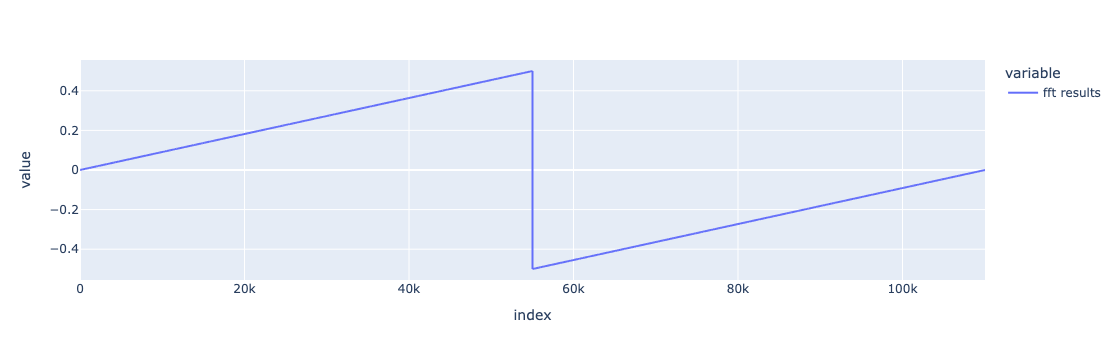

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -39.132138471849295,
  'P-value': 0.0,
  'Lags': np.int64(70),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -39.132
  P-value                         0.000
  Lags                               70
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-98.20782177707203),
  'P-value': 0.0,
  'Lags': 70,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -98.208
  P-value                         0.000
  Lags                               70
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -38.26537208599288,
  'P-value': 0.0,
  'Lags': np.int64(70),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -38.265
  P-value                         0.000
  Lags                               70
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}